# EDA on Haberman's Cancer Survival Dataset

## Haberman's Cancer Survival Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

** Attribute information**<br>
a.Age of patient at time of operation (numerical)<br>
b.Patient's year of operation (year - 1900, numerical)<br>
c.Number of positive axillary nodes detected (numerical)<br>
d.Survival status (class attribute):<br>
> 1 = the patient survived 5 years or longer <br>
> 2 = the patient died within 5 year

## OBJECTIVE

To perform EDA on Haberman's Cancer Survival dataset and to predict whether patients would survive more than 5 years or not.

## 1. High Level Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load haberman.csv into pandas dataframe
haberman=pd.read_csv("haberman.csv")

In [2]:
#Adding Attribute names
columns=['Age','Year','Axillary nodes','Survival status']
haberman=pd.read_csv("haberman.csv",names=columns)
haberman.head()

,Age,Year,Axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#Number of datapoints and features
print(haberman.shape)

(306, 4)


In [4]:
#Number of data points for survival status 1 and 2
haberman['Survival status'].value_counts()

1    225
2     81
Name: Survival status, dtype: int64

In [5]:
#Selecting rows with survival status 1 and loading into dataframe more_five
more_five=haberman.loc[haberman["Survival status"]==1]

#Selecting rows with survival status 2 and loading into dataframe less_five
less_five=haberman.loc[haberman["Survival status"]==2]

In [6]:
#Summary statistics of Haberman's cancer survival dataset
haberman.describe()

,Age,Year,Axillary nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
#Summary statistics of patients who survived more than 5 years
more_five.describe()

,Age,Year,Axillary nodes,Survival status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [8]:
#Summary statistics of patients who survived less than 5 years
less_five.describe()

,Age,Year,Axillary nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [9]:
#Count of each number of axillary nodes for patients who survived more than 5 years
more_five["Axillary nodes"].value_counts()

0     117
1      33
2      15
3      13
4      10
7       5
8       5
6       4
14      3
10      2
22      2
5       2
9       2
46      1
11      1
30      1
13      1
15      1
16      1
18      1
19      1
20      1
25      1
28      1
12      1
Name: Axillary nodes, dtype: int64

In [10]:
#Count of each number of axillary nodes for patients who survived less than 5 years
less_five["Axillary nodes"].value_counts()

0     19
1      8
3      7
2      5
9      4
5      4
13     4
23     3
4      3
6      3
11     3
19     2
15     2
7      2
8      2
52     1
10     1
35     1
14     1
17     1
20     1
21     1
22     1
24     1
12     1
Name: Axillary nodes, dtype: int64

## OBSERVATIONS

1.Haberman's cancer survival dataset contains 306 observtions.<br>
<br>
2.The dataset is an imbalanced dataset as the number of people who survived more than 5 years is 225 and who didn't is 81.<br>
<br>
2.50% of patients who survived more than 5 years had no Axillary nodes.<br>
<br>
3.75% of patients who lasted more than 5 years had less than 4 Axillary nodes.<br>
<br>
4.It is observed that some patients with number of Axillary nodes greater than 20 has survived more than 5 years while some patients with zero Axillary nodes didn't last more than 5 years.

## 2.Univariate Analysis

> ### 2.1 Histogram

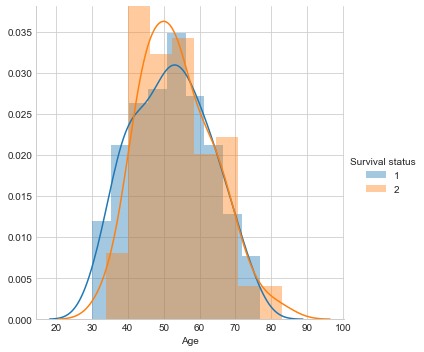

In [11]:
#for Age at the time of operation
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue="Survival status",size=5)\
.map(sns.distplot,"Age")\
.add_legend()

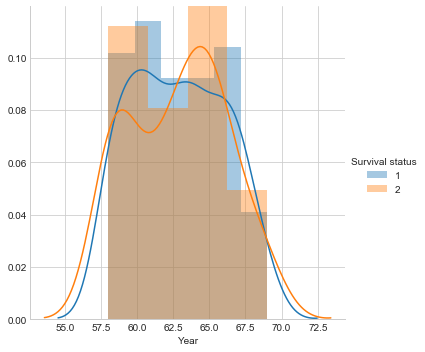

In [12]:
#for Year of operation
sns.FacetGrid(haberman,hue="Survival status",size=5)\
.map(sns.distplot,"Year")\
.add_legend()

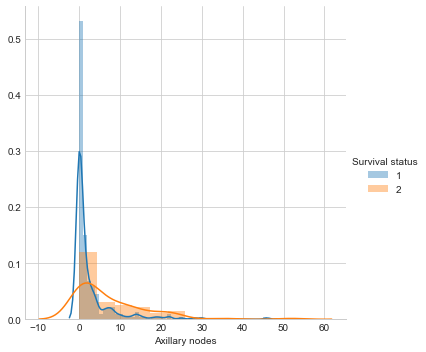

In [13]:
#for number of Axillary nodes
sns.FacetGrid(haberman,hue="Survival status",size=5)\
.map(sns.distplot,"Axillary nodes")\
.add_legend()

## OBSERVATIONS

1.The plot for Age is overlapping and almost similar.So they are not much useful for differentiating the classes.<br>
<br>
2.The plot for Year of operation is also overlapping and mostly similar.So year of operations is also not a useful feauture for differetiating the classes.<br>
<br>
3.From the number of Axillary nodes plot it can be observed that patients with zero axillary nodes have higher chance of surviving more than 5 years<br>
<br>
4.As the number of Axillary nodes increases chance of surviving more than 5 years decreases.

> ### 2.2 PDF and CDF

PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin Edges [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

CDF: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]

PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]

Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

CDF: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]



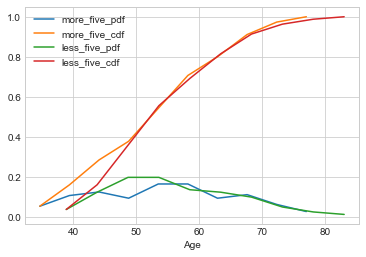

In [14]:
#for Age at the time of operation
counts,bin_edges=np.histogram(more_five["Age"],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF: {}".format(pdf))
print("Bin Edges {}\n".format(bin_edges))
cdf=np.cumsum(pdf)
print("CDF: {}\n".format(cdf))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts,bin_edges=np.histogram(less_five["Age"],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF: {}\n".format(pdf))
print("Bin Edges: {}\n".format(bin_edges))
cdf=np.cumsum(pdf)
print("CDF: {}\n".format(cdf))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["more_five_pdf","more_five_cdf","less_five_pdf","less_five_cdf"])
plt.xlabel("Age")
plt.show()

PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

CDF: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]

PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

CDF: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]



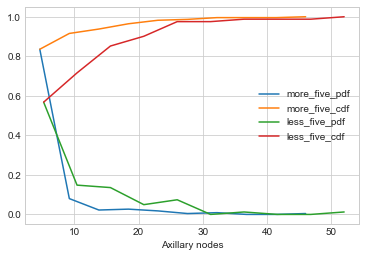

In [15]:
#for number of Axillary nodes
counts,bin_edges=np.histogram(more_five["Axillary nodes"],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF: {}\n".format(pdf))
print("Bin Edges {}\n".format(bin_edges))
cdf=np.cumsum(pdf)
print("CDF: {}\n".format(cdf))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts,bin_edges=np.histogram(less_five["Axillary nodes"],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF: {}\n".format(pdf))
print("Bin Edges: {}\n".format(bin_edges))
cdf=np.cumsum(pdf)
print("CDF: {}\n".format(cdf))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["more_five_pdf","more_five_cdf","less_five_pdf","less_five_cdf"])
plt.xlabel("Axillary nodes")
plt.show()

PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

CDF: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]

PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]

Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

CDF: [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]



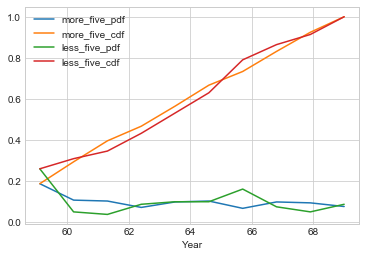

In [16]:
#for the year of operation
counts,bin_edges=np.histogram(more_five["Year"],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF: {}\n".format(pdf))
print("Bin Edges {}\n".format(bin_edges))
cdf=np.cumsum(pdf)
print("CDF: {}\n".format(cdf))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts,bin_edges=np.histogram(less_five["Year"],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF: {}\n".format(pdf))
print("Bin Edges: {}\n".format(bin_edges))
cdf=np.cumsum(pdf)
print("CDF: {}\n".format(cdf))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["more_five_pdf","more_five_cdf","less_five_pdf","less_five_cdf"])
plt.xlabel("Year")
plt.show()

## OBSERVATIONS

1.The plots of Age at the time of operation and Year of operations for both  classes are almost overlapping.<br>
<br>
2.Patients who are of age 48 or below have a slightly higher chance of surviving past 5 years and patients who are of age       greater than 77 seems not to survive more than 5 years.<br>
<br>
3.Patients operated during the period of 1961-1965 had a slightly higher chance to survive more than 5 years.<br>
<br>
4.The plot of Axillary nodes is a bit overlapping.<br>
<br>
5.Patients with number of Axillary nodes less than 25 has a slightly higher chance of surviving more than 5 years.<br>
<br>
6.Patients with number of Axillary nodes greater than 46 doesn't seem to survive more than 5 years.

> ### 2.3 Box Plot

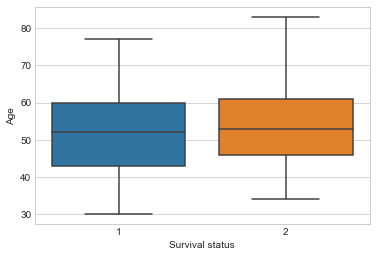

In [17]:
#Boxplot for Age

sns.boxplot(x="Survival status",y="Age",data=haberman)
plt.show()



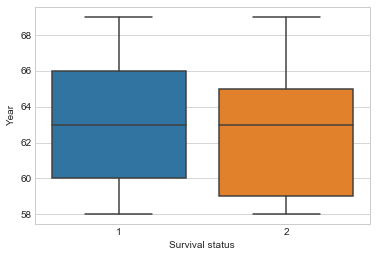

In [18]:
#Boxplot for year of operation
sns.boxplot(x='Survival status',y='Year',data=haberman)
plt.show()

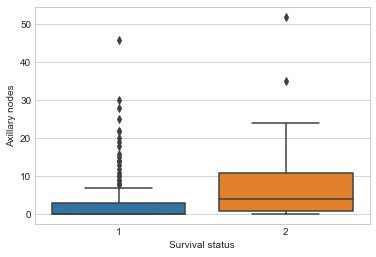

In [19]:
#Boxplot for number of Axillary nodes
sns.boxplot(x='Survival status',y='Axillary nodes',data=haberman)
plt.show()

## OBSERVATION

1.The boxplot for Age of patients are similar for both classes with mean age being 52 for patients who survived more than five years and 53 for those who didn't.<br>
<br>
2.50% of patients who survived more than 5 years has year of operation between 1960 and 1966.<br>
<br>
3.50% of patients who survived less than 5 years has year of operation between 1959 and 1965.<br>
<br>
4.50% of patients who survives more than 5 years have number of Axillary nodes to be zero.

> ### 2.4 Violin Plot

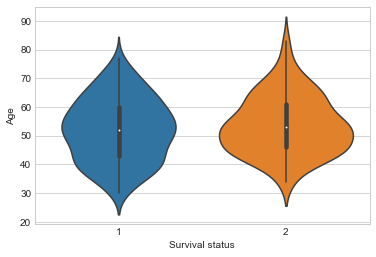

In [20]:
#Viloin plot for Age of the patient at the time of operation
sns.violinplot(x='Survival status',y='Age',data=haberman)
plt.show()

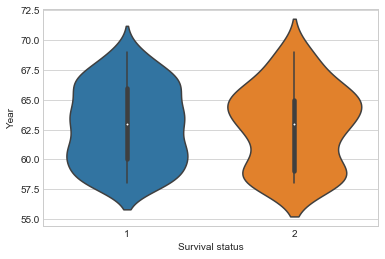

In [21]:
#Violin plot of Year of operation
sns.violinplot(x='Survival status',y='Year',data=haberman)
plt.show()

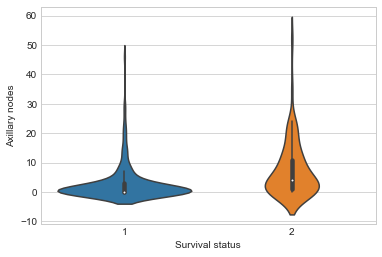

In [22]:
#Violin plot for number of Axillary nodes
sns.violinplot(x='Survival status',y='Axillary nodes',data=haberman)
plt.show()

## OBSERVATIONS

1.Violin plots of Year and Age doesn't give much insights as for both classes they look similar.<br>
<br>
2.From violin plot of Axillary nodes it can be observed that higher probability of patients who survived more than 5 years has number of axillary nodes to be zero.

## 3.Bi-variate Analysis

### 3.1 Scatter Plot

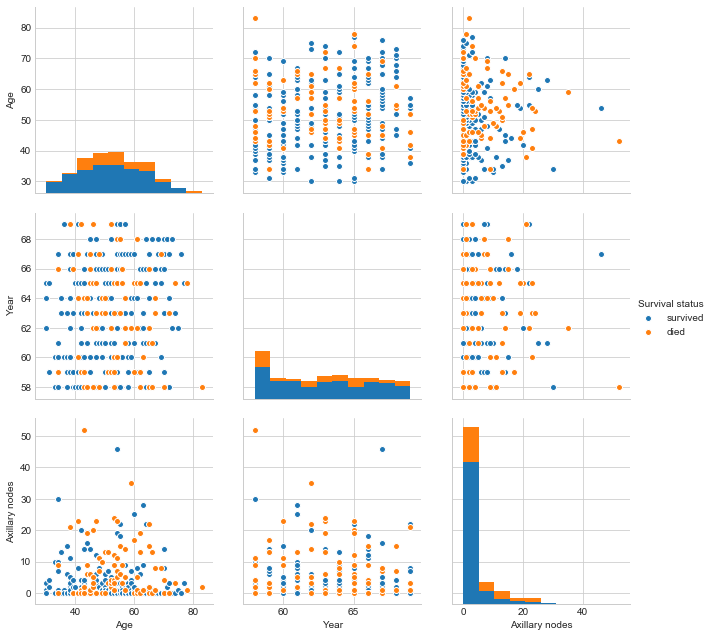

In [23]:
#Pair Plot
haberman['Survival status'] = haberman['Survival status'].map({1:"survived", 2:"died"})
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='Survival status',size=3)
plt.show()

## OBSERVATIONS

1. It is difficult to separate the datapoints as in all the scatter plots both classes are overlapping.

## CONCLUSION

1.Age of patients and Year of operation are not so helpful in classifying the patients.<br>
<br>
2.Though most patients with zero axillary nodes survived more than 5 years,there are patients who didn't survive though they had zero axillary nodes .So Axillary nodes cannot be that depended on for classification.<br>
<br>
3.The task of predicting the survival of patients more than five years is not an easy one.Even if a model can be made there are chances of making error during classification.